# Neural Network 
While neural networks are powerful for tasks like image and text data, for tabular data, it's often more practical to start with traditional machine learning models and then experiment with neural networks if needed, keeping in mind the complexity of the problem and the amount of available data.  

### Support Vector Machines (SVM) and Support Vector Regressor (SVR):
Ref: https://www.analyticsvidhya.com/blog/2020/03/support-vector-regression-tutorial-for-machine-learning/  
### Neural Networks with Fully Connected Layers:
While not the first choice for tabular data, neural networks with fully connected layers can still be experimented with. However, they may require more data and tuning compared to traditional models. **Feedforward Neural Networks** or **Embedding Neural Networks** (If your tabular data includes categorical variables, consider using embedding layers in neural networks to represent and learn the relationships between categories.) can be explored.

CHECK THIS OUT https://towardsdatascience.com/feature-extraction-techniques-d619b56e31be

### Principal Component Regression (PCR)
Combines principal component analysis (PCA) and linear regression to handle multicollinearity and reduce dimensionality.

#### Steps:
- Check Nulls
- Normilise numerical data
- OHE or LabelEncoder for categorical
- Evaluate model

#### Read the file


In [2]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt

df = pd.read_csv('dataset/train_clean.csv').drop(columns='Id')
print(f'Size of dataset: {df.shape}')
print(f'Count of nulls: {df.isna().sum().sum()}')

Size of dataset: (1986, 67)
Count of nulls: 0


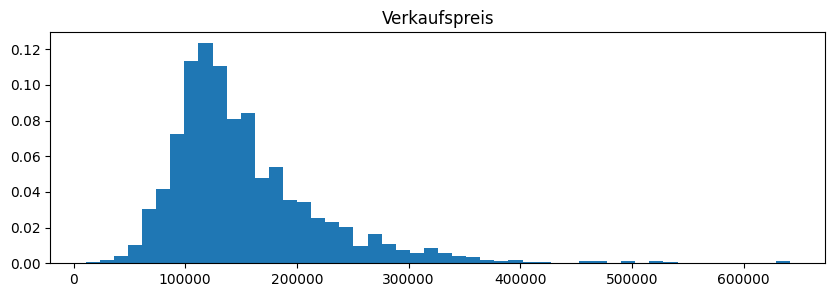

In [3]:
plt.figure(figsize=(10,3))
plt.hist(df.Verkaufspreis, bins=50,  weights=np.ones(len(df.Verkaufspreis)) / len(df.Verkaufspreis))
plt.title('Verkaufspreis')
plt.show()

#### Feature normalization

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

X = df.drop('Verkaufspreis', axis=1)
y = df['Verkaufspreis']

le = LabelEncoder()
numeric_columns = X.describe().columns
categorical_columns = X.columns.difference(numeric_columns)
for i in categorical_columns:
    X[i] = le.fit_transform(X[i])

sc_x = StandardScaler()
sc_y = StandardScaler()
X[numeric_columns] = sc_x.fit_transform(X[numeric_columns])
y = sc_y.fit_transform(np.array(y).reshape(-1, 1))
y = y.reshape(1,-1)[0]


#### Train, test, validation split


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Size of train dataset: {X_train.shape}')
print(f'Size of test dataset: {X_test.shape}')

Size of train dataset: (1588, 66)
Size of test dataset: (398, 66)


#### SVR applying


In [6]:
from sklearn.svm import SVR

model = SVR()
model.fit(X_train, y_train)


SVR()

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score, mean_absolute_percentage_error

def predict_plot(model, X_test, y_test):

    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    # Print accuracy score on the test data
    print(f'Accuracy on test data: {model.score(X_test, y_test):.4f}')

    # Print the evaluation metrics
    print(f'Mean Squared Error (MSE): {mse:.4f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
    print(f'Mean Absolute Error (MAE): {mae:.4f}')
    print(f'Mean Absolute Percentage Error (MAPE): {mape:.4f}%')

    
    # Visualize predicted vs. actual prices in a scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.title('Predicted vs. Actual Prices')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.show()

    return y_pred

Accuracy on test data: 0.9321
Mean Squared Error (MSE): 0.0516
Root Mean Squared Error (RMSE): 0.2272
Mean Absolute Error (MAE): 0.1634
Mean Absolute Percentage Error (MAPE): 2.2492%


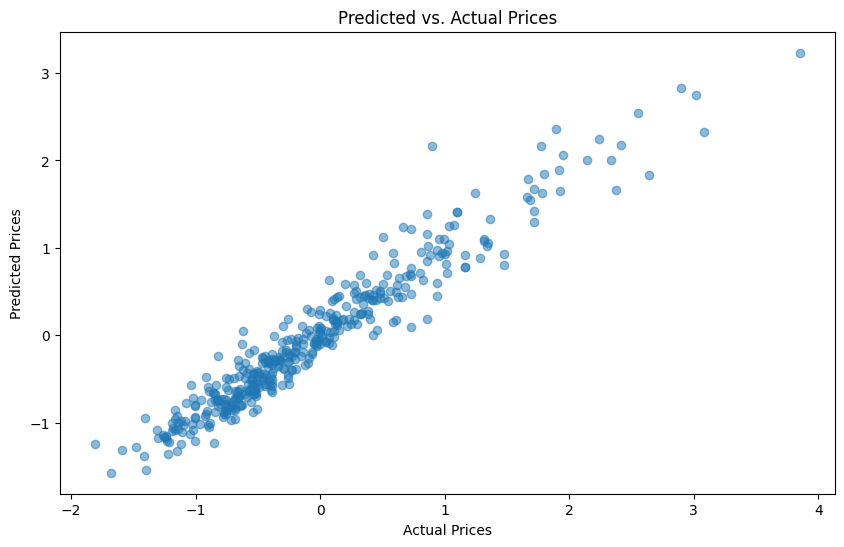

In [24]:
y_pred = predict_plot(model, X_test, y_test)

#### Adjust hyperparameters

In [52]:
n_features = 66
(1 / (n_features * X_train.var())).mean(), 1/n_features, np.linspace(0, 1.0, num=20)

(0.02975819212700105,
 0.015151515151515152,
 array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
        0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
        0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
        0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]))

In [53]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values to search
param_grid = {
    'C': [0.01, 0.5, 1, 5, 7, 10, 15, 20],
    'gamma': ['scale', 'auto', 0.01, 0.001, 0.0001],
    'epsilon': np.linspace(0, 1.0, num=20)
}

model = SVR()

# Create a grid search object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

In [54]:
print(f'Best score with CV of 5: {-grid_search.best_score_}')

# Predict on the validation set using the best model
y_pred_test = best_model.predict(X_test)

# Evaluate the model on the validation set
mse_valid = mean_squared_error(y_test, y_pred_test)
rmse_valid = np.sqrt(mse_valid)

# Print the best hyperparameters and validation performance
print(f'Best Hyperparameters: {best_params}')
print(f'Testing RMSE: {rmse_valid:.2f}')

Best score with CV of 5: 0.07936285835518425
Best Hyperparameters: {'C': 10, 'epsilon': 0.10526315789473684, 'gamma': 'scale'}
Testing RMSE: 0.24


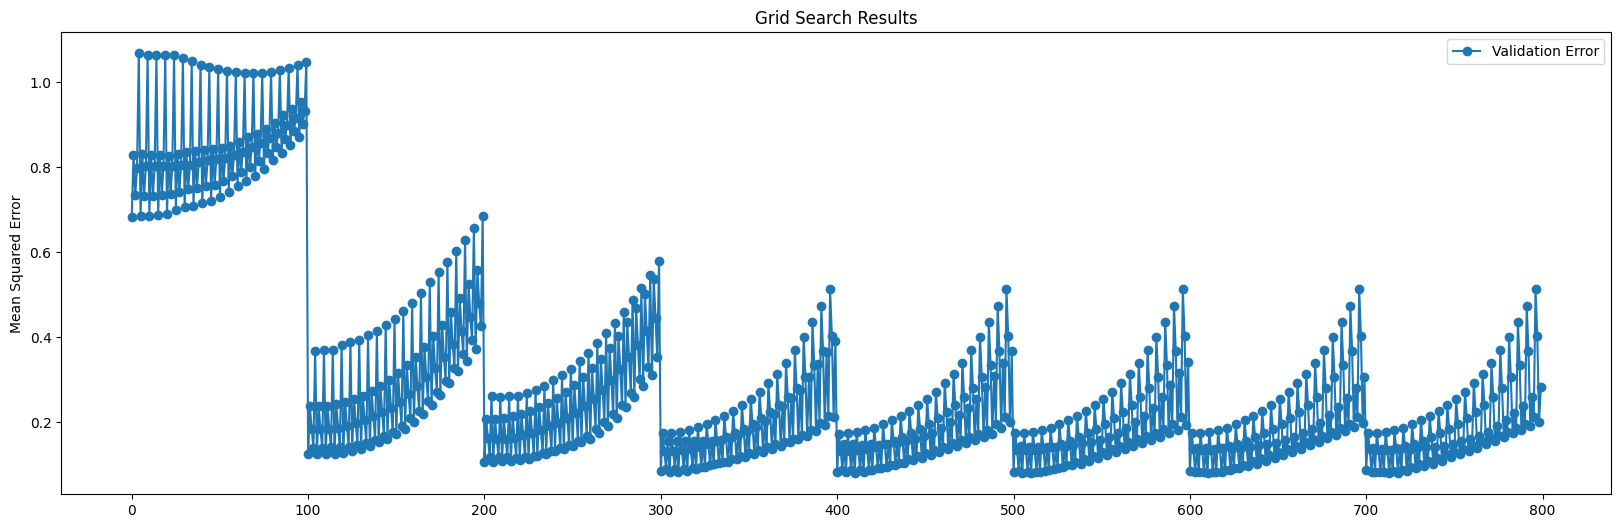

In [55]:
# Extract the cross-validated results
cv_results = grid_search.cv_results_
valid_errors = -cv_results['mean_test_score']   # Convert neg_mean_test_score to positive

# Plotting the results
plt.figure(figsize=(20, 6))
plt.plot(valid_errors, label='Validation Error', marker='o')
plt.ylabel('Mean Squared Error')
plt.title('Grid Search Results')
plt.legend()
plt.show()


Accuracy on test data: 0.9273
Mean Squared Error (MSE): 0.0553
Root Mean Squared Error (RMSE): 0.2351
Mean Absolute Error (MAE): 0.1617
Mean Absolute Percentage Error (MAPE): 4.4693%


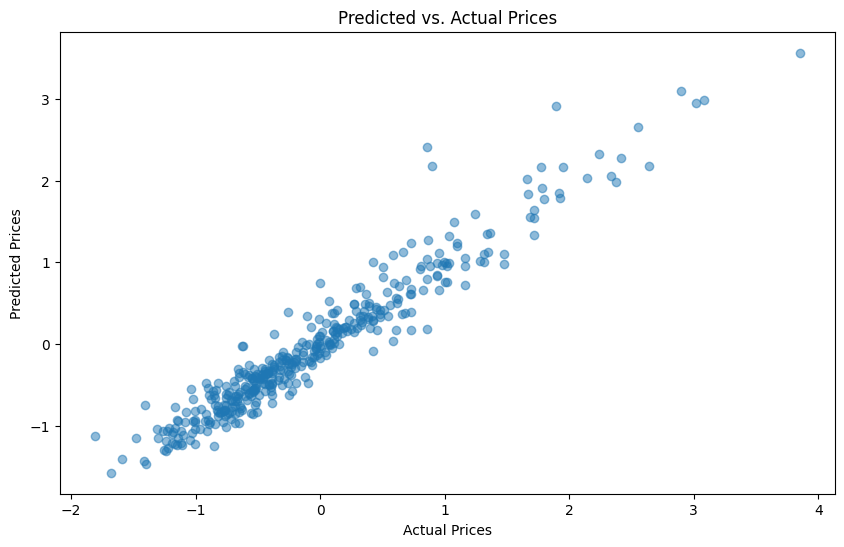

In [58]:
model = SVR(C=best_params['C'], epsilon=best_params['epsilon'], gamma=best_params['gamma'])
model.fit(X_train, y_train)

y_pred = predict_plot(model, X_test, y_test)


So model with default parameters is better. Let's look on which data point MSE is the biggest.

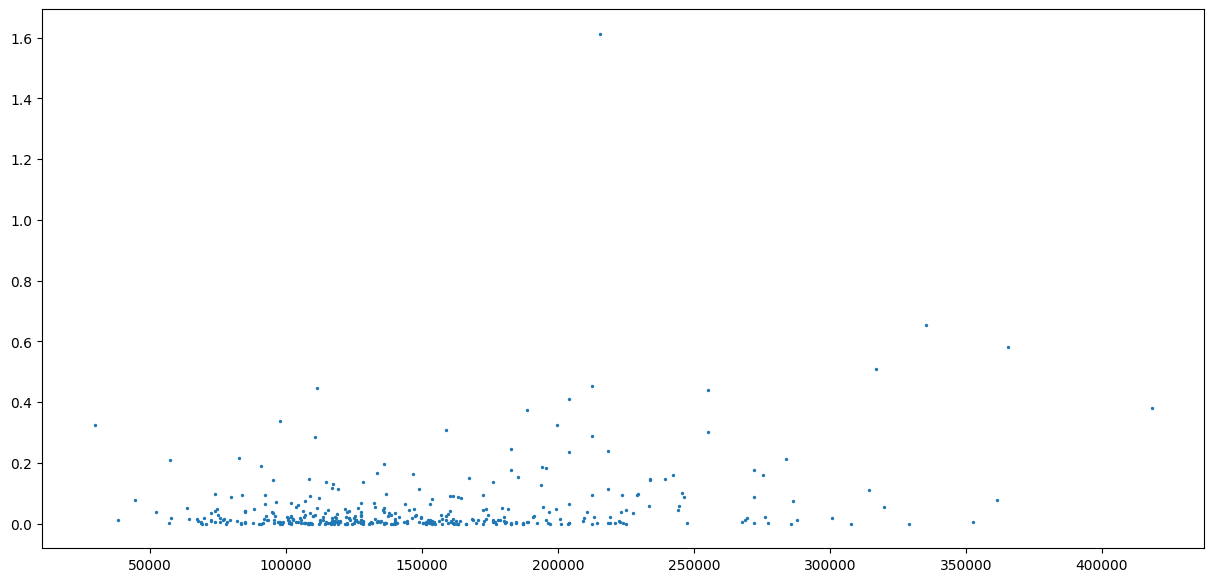

In [62]:
model = SVR()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.figure(figsize=(15, 7))
plt.scatter(sc_y.inverse_transform(y_test.reshape(-1, 1)).reshape(1,-1)[0], 
            np.abs(y_test-y_pred)**2, 
            s=2)
plt.show()


Maybe it makes sence to balanced the data. Or build two models fro different price area hhhmmmmmm

#### Dataset improvement

In [63]:
X = df.drop('Verkaufspreis', axis=1)

In [64]:
# Choose the feature with correlation with target higher than 0.6
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

buf = df.copy()

le = LabelEncoder()
numeric_columns = buf.describe().columns
categorical_columns = buf.columns.difference(numeric_columns)
for i in categorical_columns:
    buf[i] = le.fit_transform(buf[i])

target_corr = buf.corr().Verkaufspreis
threshold = 0.5
high_correlated_features = target_corr[(target_corr > threshold) | (target_corr < -threshold)].index.drop('Verkaufspreis')

In [65]:
X = X[high_correlated_features]
X.shape

(1986, 12)

Accuracy on test data: 0.8968
Mean Squared Error (MSE): 0.0785
Root Mean Squared Error (RMSE): 0.2802
Mean Absolute Error (MAE): 0.2010
Mean Absolute Percentage Error (MAPE): 1.8113%


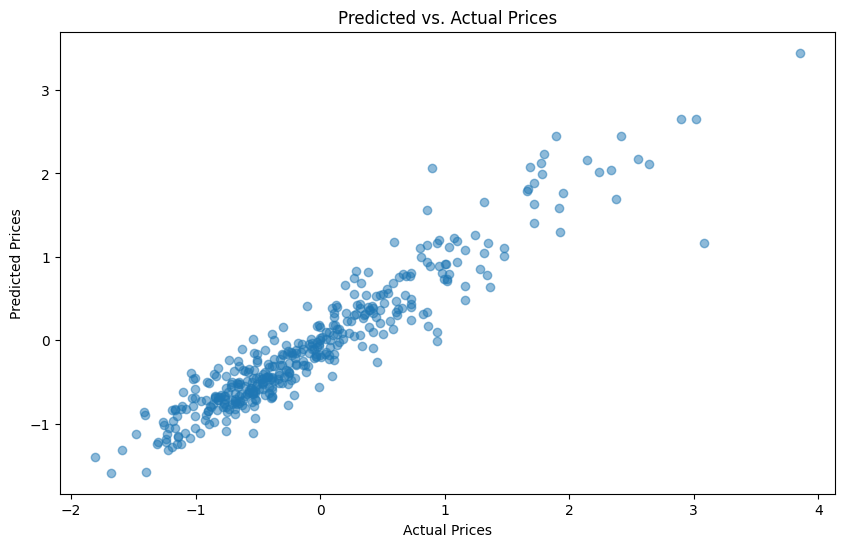

In [67]:
le = LabelEncoder()
numeric_columns = X.describe().columns
categorical_columns = X.columns.difference(numeric_columns)
for i in categorical_columns:
    X[i] = le.fit_transform(X[i])

sc_x = StandardScaler()
sc_y = StandardScaler()
X[numeric_columns] = sc_x.fit_transform(X[numeric_columns])
y = sc_y.fit_transform(np.array(y).reshape(-1, 1))
y = y.reshape(1,-1)[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVR()
model.fit(X_train, y_train)

y_pred = predict_plot(model, X_test, y_test)


In [81]:
from sklearn.decomposition import PCA


X = df.drop('Verkaufspreis', axis=1)
y = df['Verkaufspreis']

le = LabelEncoder()
numeric_columns = X.describe().columns
categorical_columns = X.columns.difference(numeric_columns)
for i in categorical_columns:
    X[i] = le.fit_transform(X[i])

sc_x = StandardScaler()
sc_y = StandardScaler()
X[numeric_columns] = sc_x.fit_transform(X[numeric_columns])
y = sc_y.fit_transform(np.array(y).reshape(-1, 1))
y = y.reshape(1,-1)[0]

pca = PCA(n_components=20)
X = pca.fit_transform(X)
# print(pca.explained_variance_ratio_)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy on test data: 0.8991
Mean Squared Error (MSE): 0.0768
Root Mean Squared Error (RMSE): 0.2771
Mean Absolute Error (MAE): 0.1975
Mean Absolute Percentage Error (MAPE): 1.7920%


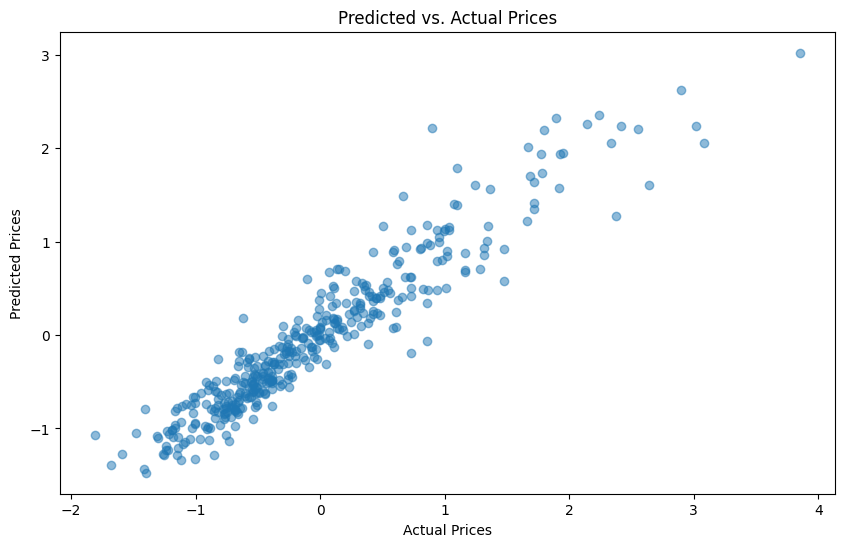

In [82]:
model = SVR()
model.fit(X_train, y_train)

y_pred = predict_plot(model, X_test, y_test)

:c doesn't develop
